In [1]:
%run models.ipynb
%run functions.ipynb

  Cloning https://www.github.com/keras-team/keras-contrib.git to c:\users\husey\appdata\local\temp\pip-req-build-pz96a2tr
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101669 sha256=e24cde2e09448e860c4ae69d28f1bf266f5b2fa8b8a2d381b380427f29b15cf5
  Stored in directory: C:\Users\husey\AppData\Local\Temp\pip-ephem-wheel-cache-ug13ipfg\wheels\67\d2\f4\96ae3c3c62d1e05abfc8860ad0c1207794726d44ebbbb547f3
Successfully built keras-contrib


In [2]:
trainA = []
dataset_path = 'images/trainA2'
for filename in os.listdir(dataset_path):
    img = cv2.imread(os.path.join(dataset_path, filename))
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    trainA.append(img)

trainB = []
dataset_path = 'images/trainB2'
for filename in os.listdir(dataset_path):
    img = cv2.imread(os.path.join(dataset_path, filename))
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    trainB.append(img)

trainA = np.array(trainA)
trainB = np.array(trainB)

In [3]:
def train(discriminatorModelA, discriminatorModelB, generatormodelAtoB, generatormodelBtoA, 
          compositeModelAtoB, compositeModelBtoA, trainA, trainB, LPatch, LEpochs, LBatch, LBatchPerEpoch,
          LPoolA, LPoolB):
    LSteps = LBatchPerEpoch * LEpochs
    print("> Number Of Iterations: %d" % (LSteps))
    for i in range(LSteps):
        start = datetime.datetime.now()
        XRealA, yRealA = generateRealSamples(trainA, LBatch, LPatch)
        XRealB, yRealB = generateRealSamples(trainB, LBatch, LPatch)
        print("Generated Real Samples")
        
        XFakeA, yFakeA = generateFakeSamples(generatormodelBtoA, XRealB, LPatch)
        XFakeB, yFakeB = generateFakeSamples(generatormodelAtoB, XRealA, LPatch)    
        print("Generated Fake Samples")
        
        XFakeA = updateImagePool(LPoolA, XFakeA)
        XFakeB = updateImagePool(LPoolB, XFakeB)
        print("Updated Image Pool")
        
        gloss2, _, _, _, _  = compositeModelBtoA.train_on_batch([XRealB, XRealA], [yRealA, XRealA, XRealB, XRealA])
        
        dAloss1 = discriminatorModelA.train_on_batch(XRealA, yRealA)
        dAloss2 = discriminatorModelA.train_on_batch(XFakeA, yFakeA)
        
        gloss1, _, _, _, _ = compositeModelAtoB.train_on_batch([XRealA, XRealB], [yRealB, XRealB, XRealA, XRealB])
        print("Calculated Generator Loss")
        
        dBloss1 = discriminatorModelA.train_on_batch(XRealB, yRealB)
        dBloss2 = discriminatorModelB.train_on_batch(XFakeB, yFakeB)
        print("Calculated Discriminator Loss")
        
        print(">%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]" % (i+1, dAloss1, dAloss2, dBloss1, dBloss2, gloss1, gloss2))
        if (i + 1) % 5 == 0:
            summarizePerformance(i, generatormodelAtoB, trainA, 'AtoB')
            summarizePerformance(i, generatormodelBtoA, trainB, 'BtoA')
        
        end = datetime.datetime.now()
        print(end-start)
        print("Epochs:"+str(i + 1))
        print("Finished")

In [4]:
discriminatorModelA = load_model('models/discriminatorModelA.h5', custom_objects={'InstanceNormalization':keras_contrib.layers.InstanceNormalization})
discriminatorModelB = load_model('models/discriminatorModelB.h5', custom_objects={'InstanceNormalization':keras_contrib.layers.InstanceNormalization})
generatorModelAtoB = load_model('models/generatorModelAtoB.h5', custom_objects={'InstanceNormalization':keras_contrib.layers.InstanceNormalization})
generatorModelBtoA = load_model('models/generatorModelBtoA.h5', custom_objects={'InstanceNormalization':keras_contrib.layers.InstanceNormalization})
compositeModelBtoA = load_model('models/compositeModelBtoA.h5', custom_objects={'InstanceNormalization':keras_contrib.layers.InstanceNormalization})
compositeModelAtoB = load_model('models/compositeModelAtoB.h5', custom_objects={'InstanceNormalization':keras_contrib.layers.InstanceNormalization})

In [5]:
LPatch = discriminatorModelA.output_shape[1]
LEpochs, LBatch = 100, 1
LBatchPerEpoch = int(len(trainA) / LBatch)
LPoolA, LPoolB = list(), list()
train(discriminatorModelA, discriminatorModelB, generatorModelAtoB, generatorModelBtoA, 
      compositeModelAtoB, compositeModelBtoA, trainA, trainB, LPatch, LEpochs, LBatch, LBatchPerEpoch, LPoolA, LPoolB)

> Number Of Iterations: 1
Generated Real Samples
Generated Fake Samples
Updated Image Pool
Calculated Generator Loss
Calculated Discriminator Loss
>1, dA[0.006,0.008] dB[0.011,0.013] g[5.703,5.846]
0:01:53.574408
Epochs:1
Finished


In [6]:
generatorModelAtoB.save("models/generatorModelAtoB.h5")
discriminatorModelB.save("models/discriminatorModelB.h5")
generatorModelBtoA.save("models/generatorModelBtoA.h5")
discriminatorModelA.save("models/discriminatorModelA.h5")
compositeModelBtoA.save("models/compositeModelBtoA.h5")
compositeModelAtoB.save("models/compositeModelAtoB.h5")

  Cloning https://www.github.com/keras-team/keras-contrib.git to c:\users\husey\appdata\local\temp\pip-req-build-mrahz8bo


ERROR: Command errored out with exit status 128: git clone -q https://www.github.com/keras-team/keras-contrib.git 'C:\Users\husey\AppData\Local\Temp\pip-req-build-mrahz8bo' Check the logs for full command output.


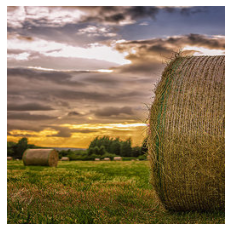

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


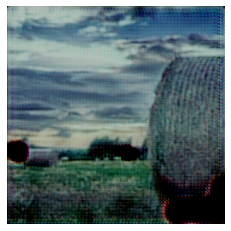

In [7]:
%run test.ipynb